In [2]:
# python 3 version of code for making your own julia fractal
# 
# blog and book at http://makeyourownmandelbrot.blogspot.co.uk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# set the location and size of the atlas rectangle
n = 1000
xvalues = np.linspace(-2, 2, n)
yvalues = np.linspace(-2, 2, n)

# size of these lists of x and y values
xlen = len(xvalues)
ylen = len(yvalues)


In [4]:
def tracepoint(number,count):
    x=np.zeros(count)
    y=np.zeros(count)
    color = np.zeros(count)
    x[0], y[0] = number.real, number.imag
    for i in range(1,count):
        number = number*number
        numx, numy = number.real, number.imag
        x[i] = numx
        y[i] = numy
        color[i] = i
    ax1.scatter(x, y,c = color,cmap = 'viridis',label=color,s=10)
    # ax1.plot(x,y,"--")
    return color
    

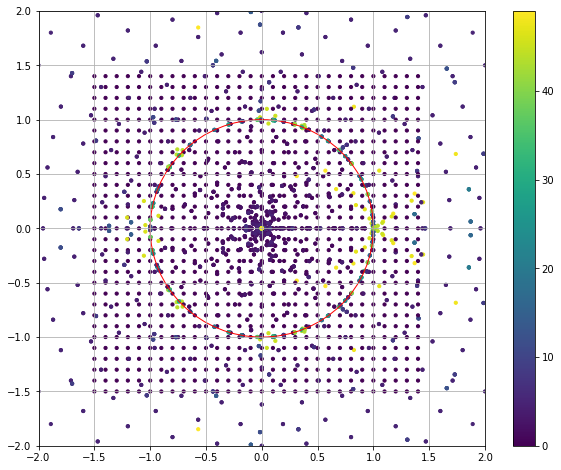

In [5]:
#Plot a single point, then update plot with iterations for several example points
fig = plt.figure(figsize=(10,8))#,dpi=500) #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()

# number = complex(-0.768662, 0.0930477)
# numx = number.real
# numy = number.imag

count = 50

# x=np.zeros(count)
# y=np.zeros(count)
# color = np.zeros(count)

# for i in range(1,count):
#     number = number*number
#     numx, numy = number.real, number.imag
#     x[i] = numx
#     y[i] = numy
#     color[i] = i
for a in np.arange(-1.5,1.5,.1):
    for b in np.arange(-1.5,1.5,.1):
        number = complex(a, b)
        color = tracepoint(number,count)

circle1 = plt.Circle((0, 0), 1, color='r',fill = False)
ax1.add_patch(circle1)
norm = matplotlib.colors.Normalize(vmin=0, vmax=color[-1], clip=False)
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax1)
# ax1.scatter(x, y,c = color,cmap = 'viridis',label=color,s=10)

In [6]:
# julia function, takes the fixed parameters z and c, and the maximum number of iterations maxiter, as inputs
def julia(z, c, maxiter):
    
    # start iterating and stop when it's done maxiter times
    for iteration in range(maxiter):
        
        # the main function which generates the output value of z from the input values using the formula (z^2) + c
        z = (z*z) + c
        
        # check if the (pythagorean) magnitude of the output complex number z is bigger than 4, and if so stop iterating as we've diverged already
        if abs(z) > 4:
            break
    
    # return the number of iterations we actually did, not the final value of z, as this tells us how quickly the values diverged past the magnitude threshold of 4
    return iteration

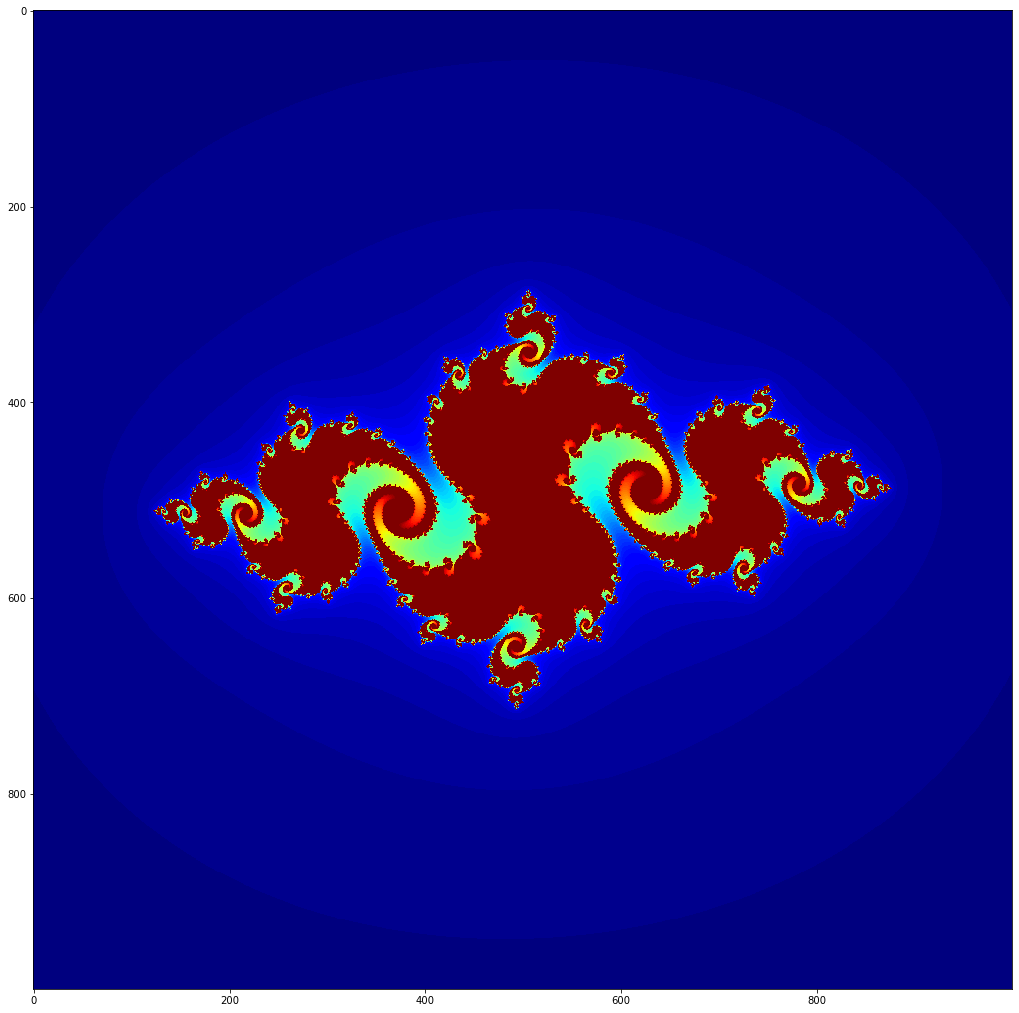

In [7]:
# value of c (unique for each Julia set)
c = complex(-0.768662, 0.0930477)
#c = complex(-0.166517,-0.662029)

# create an array of the right size to represent the atlas, we use the number of items in xvalues and yvalues
atlas = np.zeros((xlen,ylen))

# go through each point in this atlas array and test to see how many iterations are needed to diverge (or reach the maximum iterations when not diverging)
for ix in range(xlen):
    for iy in range(ylen):
        
        # at this point in the array, work out what the actual real and imaginary parts of x are by looking it up in the xvalue and yvalue lists
        zx = xvalues[ix]
        zy = yvalues[iy]
        z = complex(zx, zy)
        
        # now we know what c is for this place in the atlas, apply the julia() function to return the number of iterations it took to diverge
        # we use 80 maximum iterations to stop and accept the function didn't diverge
        atlas[ix,iy] = julia(z, c, 80)

# set the figure size
plt.figure(figsize=(18,18))

# plot the array atlas as an image, with its values represented as colours, peculiarity of python that we have to transpose the array
plt.imshow(atlas.T, interpolation="nearest", cmap="jet")